In [1]:
import pandas as pd

df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

print(df.shape)
df.info()

(6930, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capita_income               6930 non-null   float64
 7   inflation_rate                  6930 non-null   float64
 8   population_density              6930 non-null   int64  
 9   gender_ratio                    6930 non-null   int64  
 10  literacy_rate                   6930 non-null   float64
 11  youth_population_percent        6930 non-null   float64
 12  urbanization_rate      

In [2]:
print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())
df.duplicated().sum()

                       State              Crime_Type  Year  Cases  \
0  Andaman & Nicobar Islands                Burglary  2001     57   
1  Andaman & Nicobar Islands                 Dacoity  2001      7   
2  Andaman & Nicobar Islands            Dowry Deaths  2001      0   
3  Andaman & Nicobar Islands  Kidnapping & Abduction  2001     33   
4  Andaman & Nicobar Islands                  Murder  2001     10   

   unemployment_rate  poverty_rate  per_capita_income  inflation_rate  \
0               5.88         38.54            21691.8             4.4   
1               5.88         38.54            21691.8             4.4   
2               5.88         38.54            21691.8             4.4   
3               5.88         38.54            21691.8             4.4   
4               5.88         38.54            21691.8             4.4   

   population_density  gender_ratio  literacy_rate  youth_population_percent  \
0                  10           915          61.94                

np.int64(0)

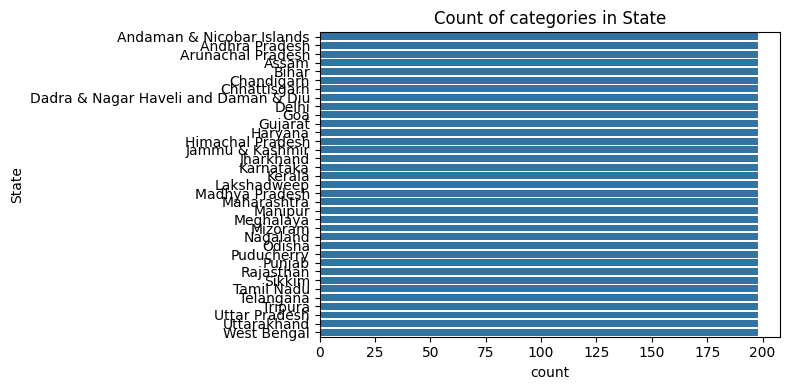

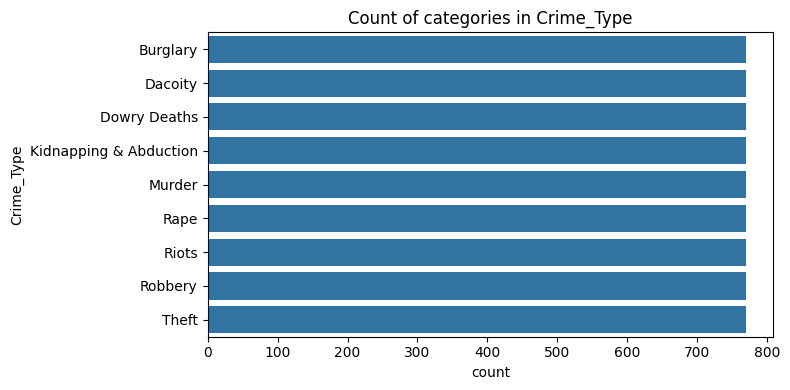

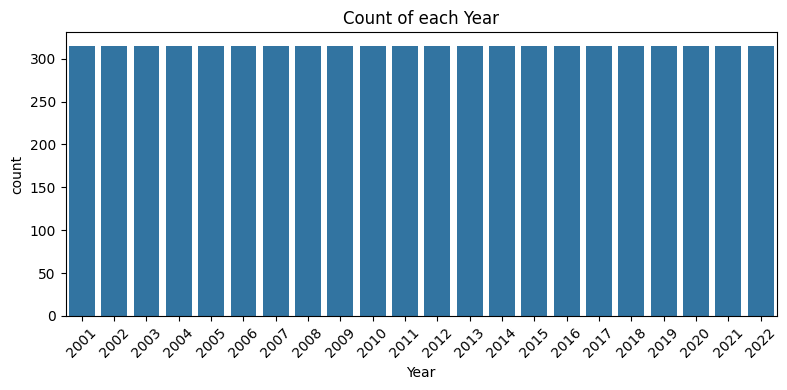

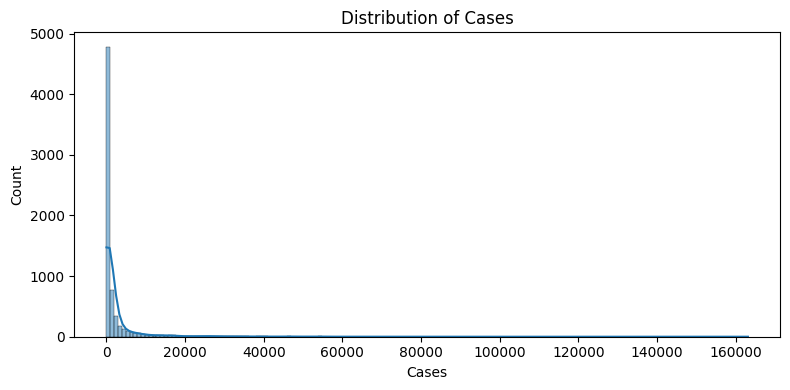

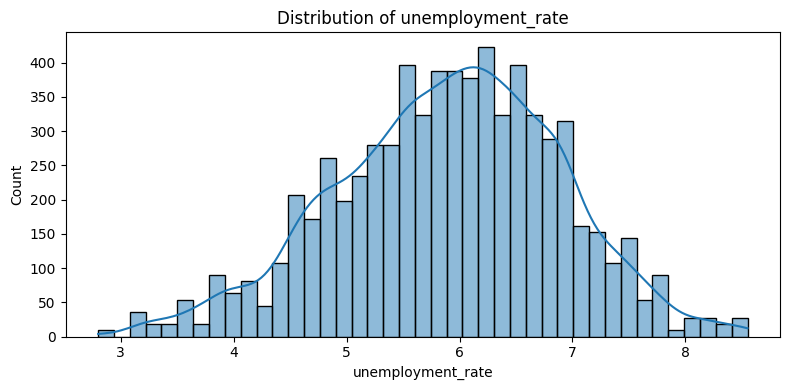

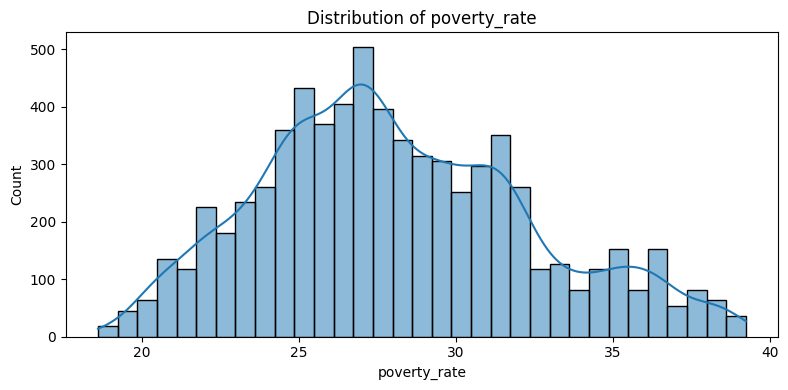

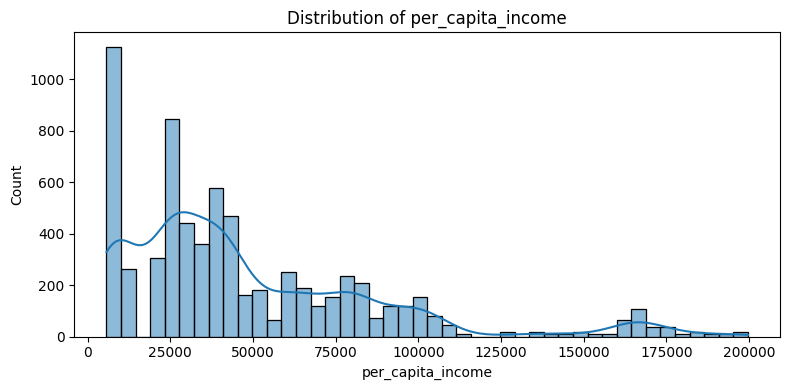

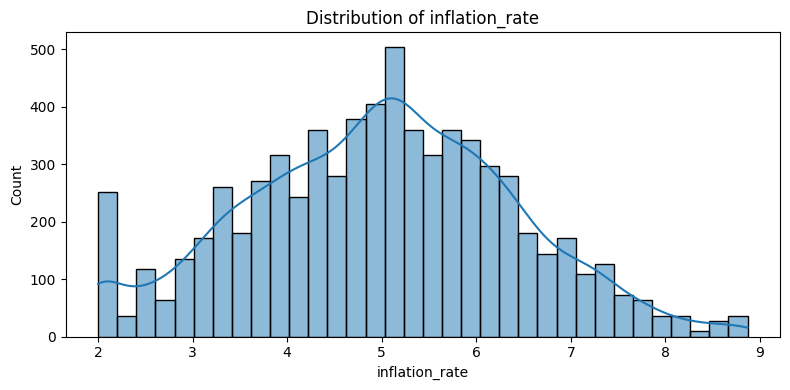

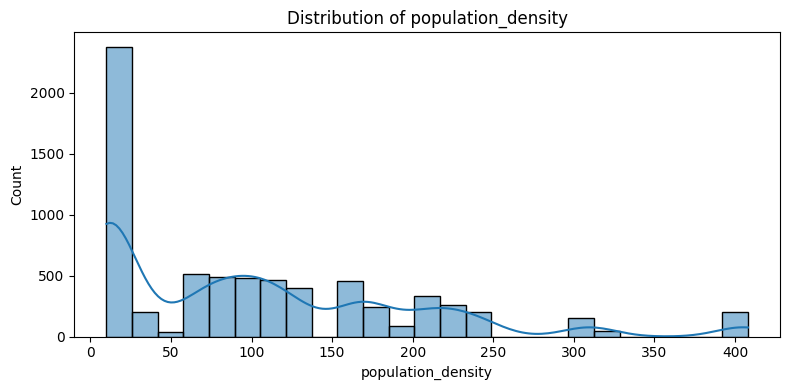

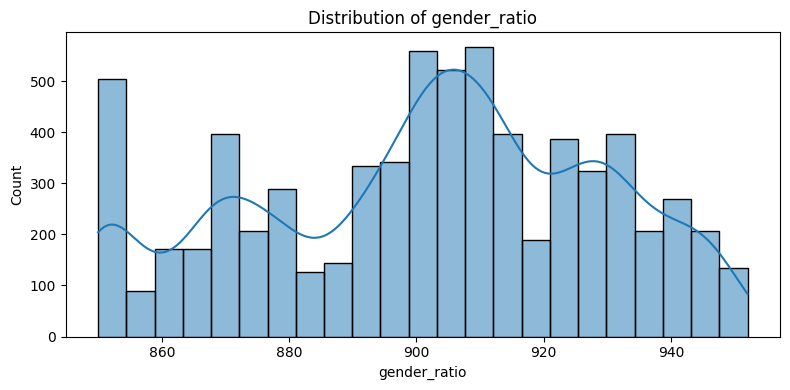

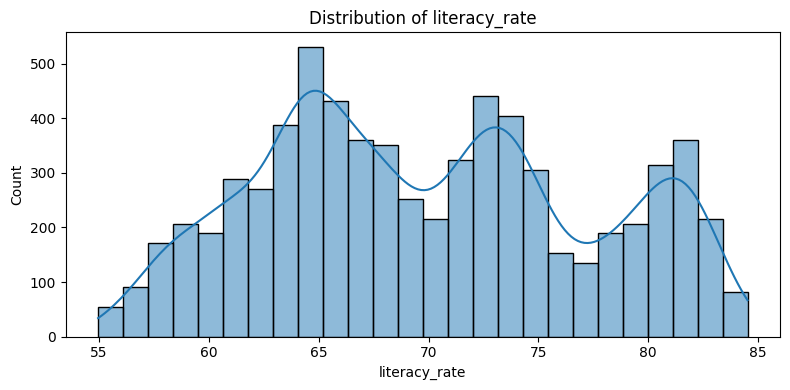

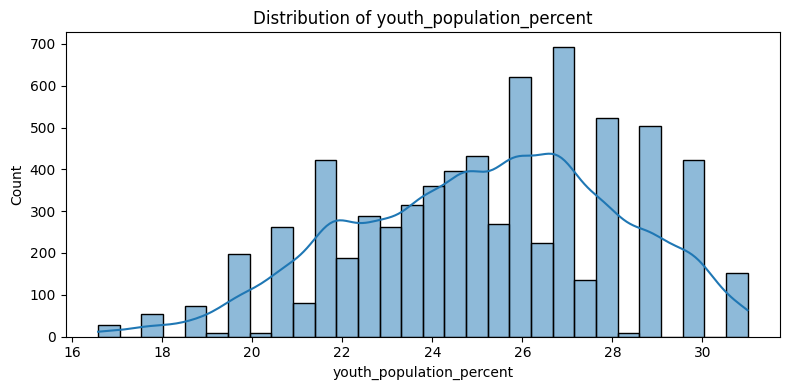

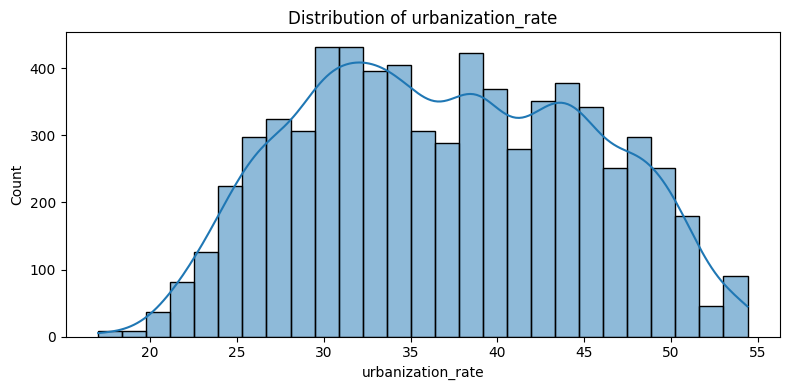

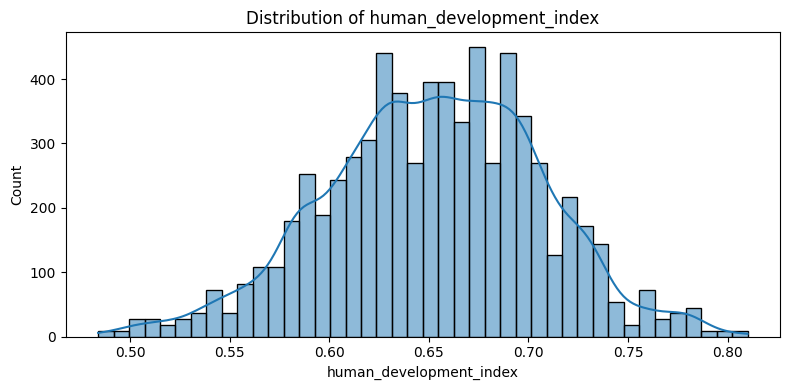

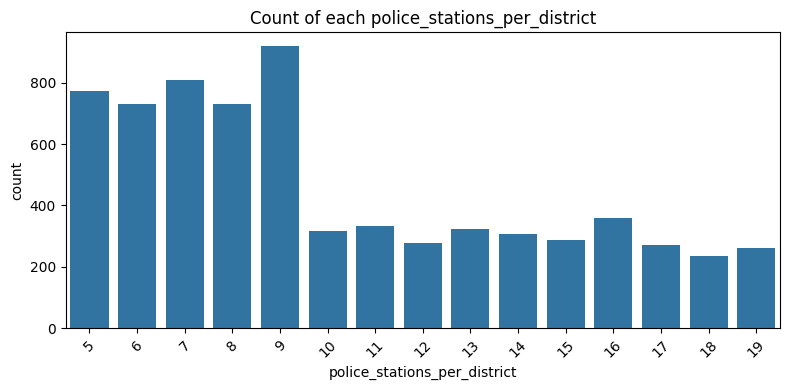

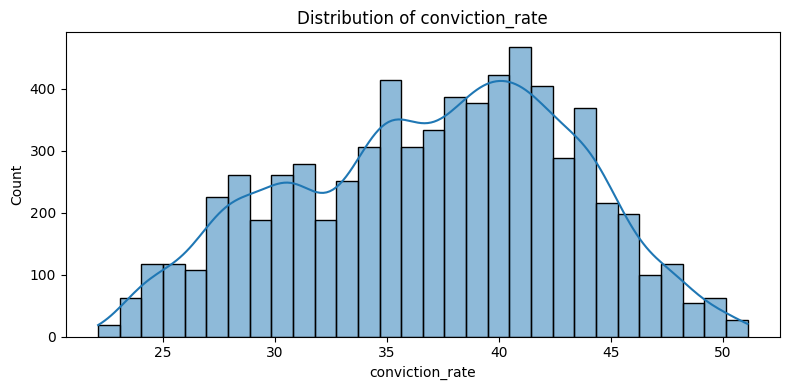

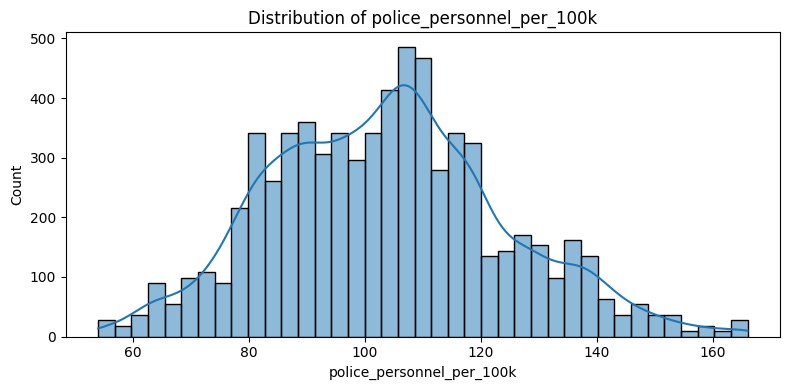

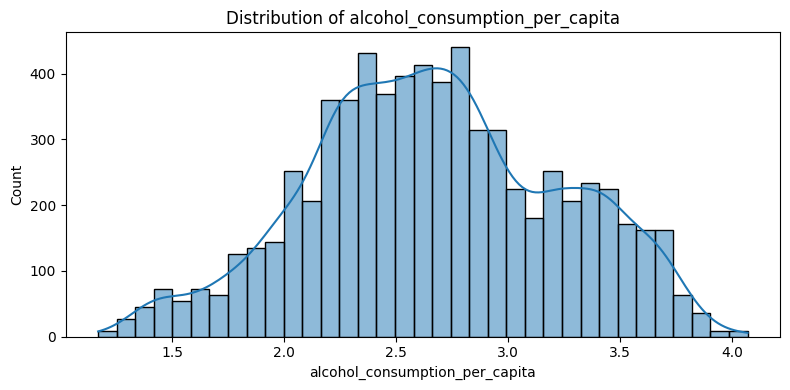

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in df.columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 25:
        sns.countplot(x=col, data=df)
        plt.title(f"Count of each {col}")
        plt.xticks(rotation=45)
        
    elif df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        
    else: 
        sns.countplot(y=col, data=df)
        plt.title(f"Count of categories in {col}")
        
    plt.tight_layout()
    plt.show()


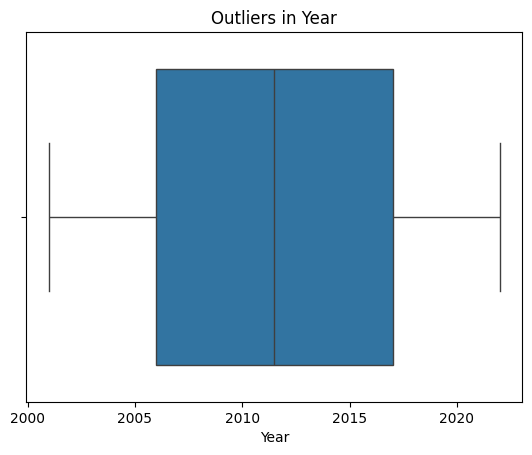

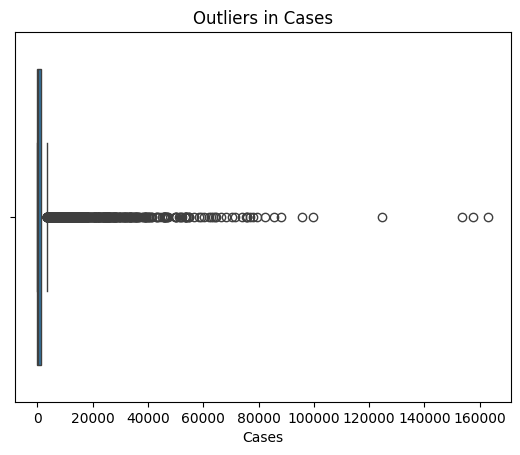

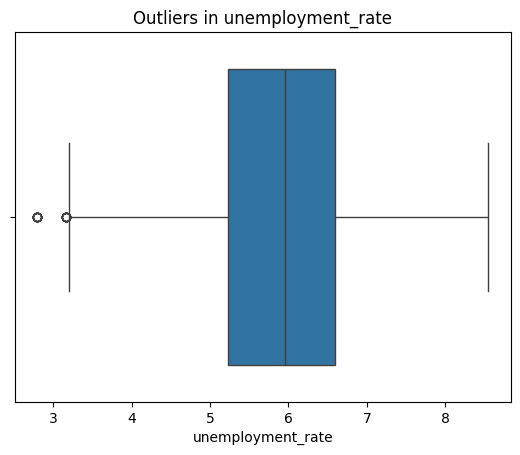

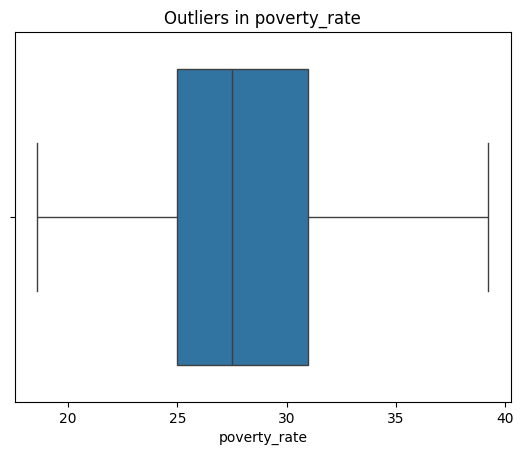

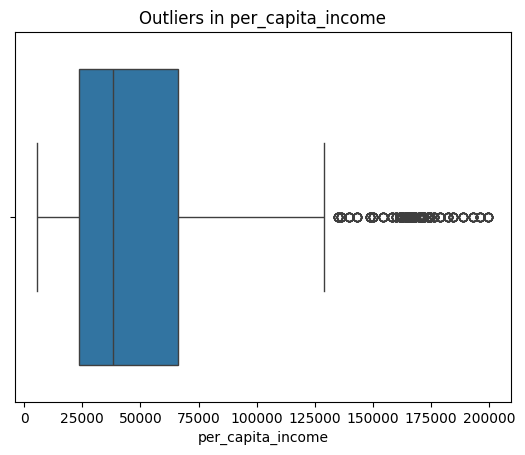

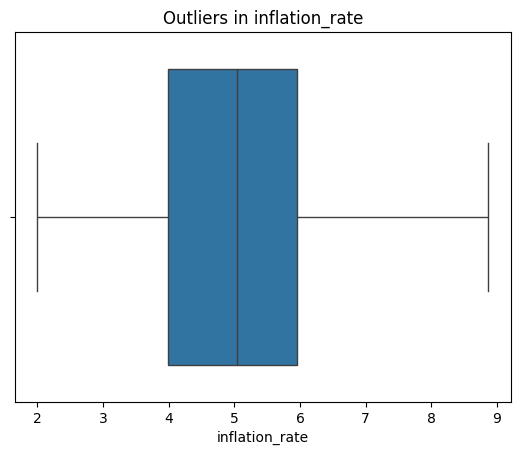

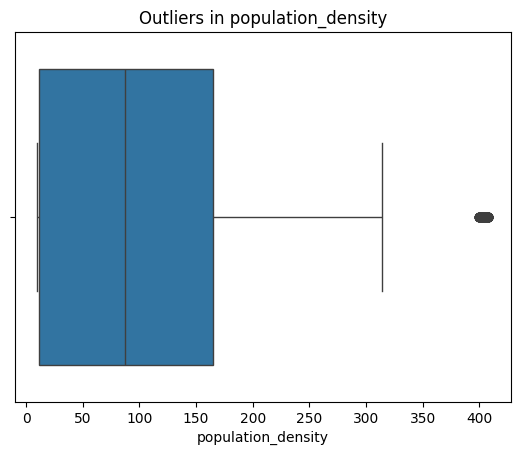

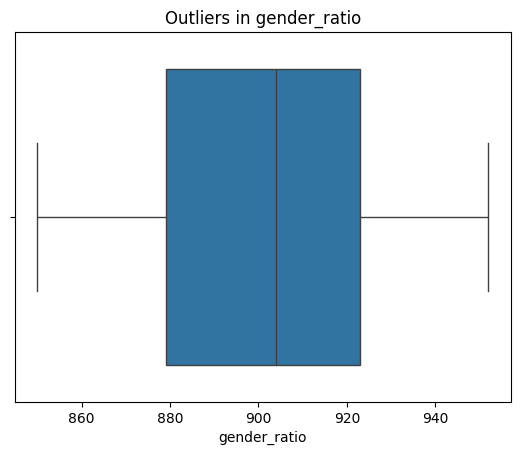

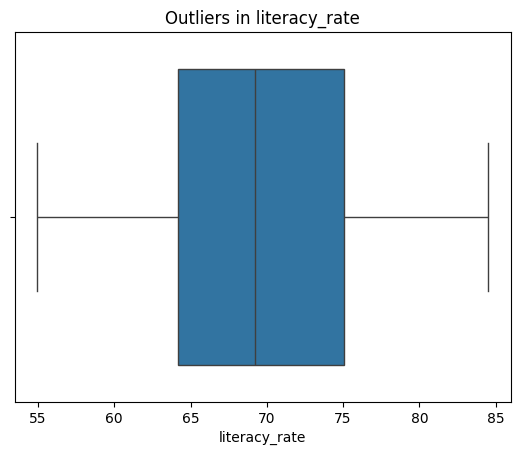

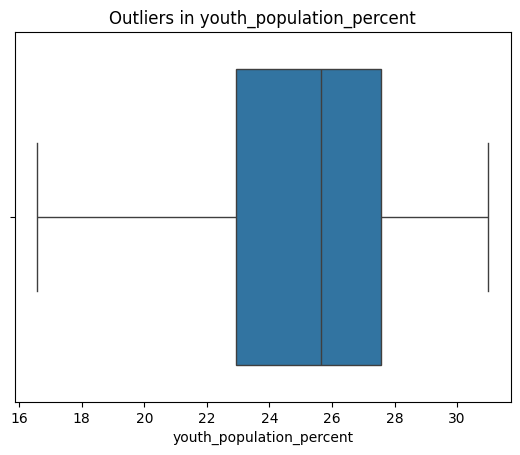

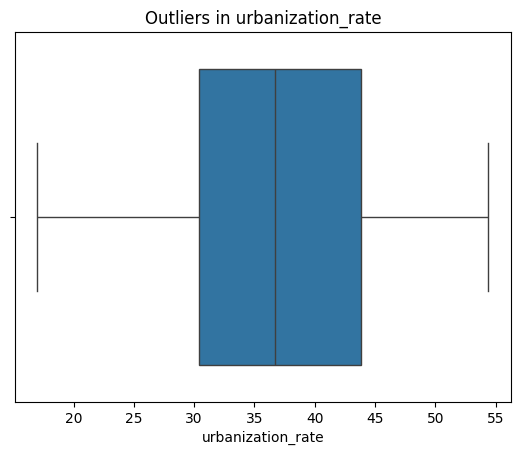

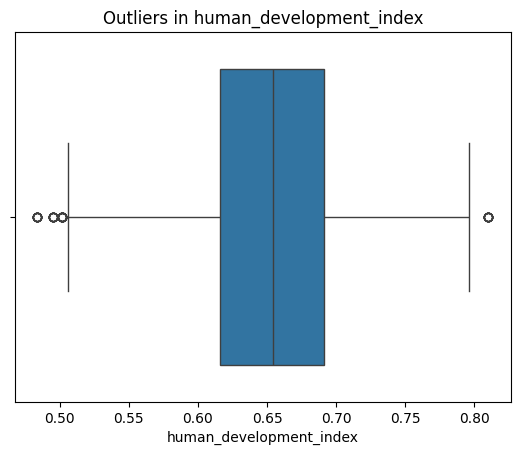

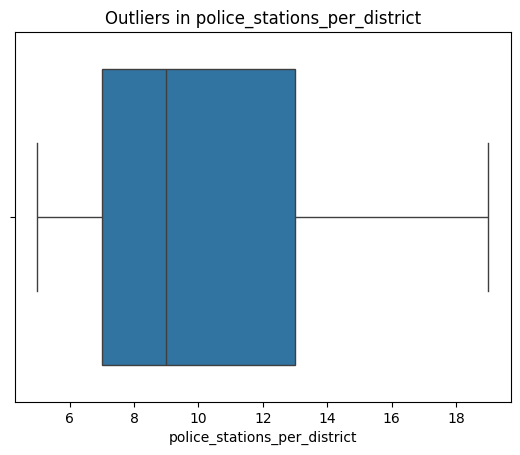

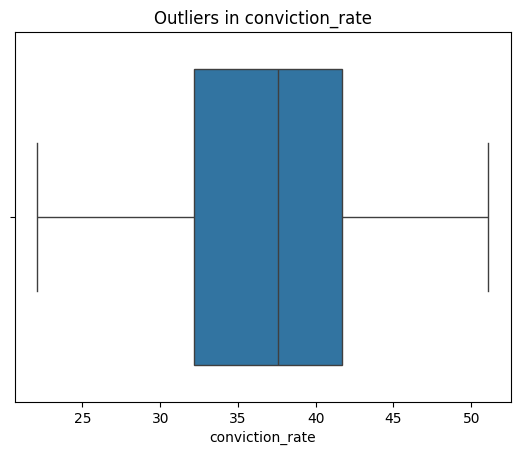

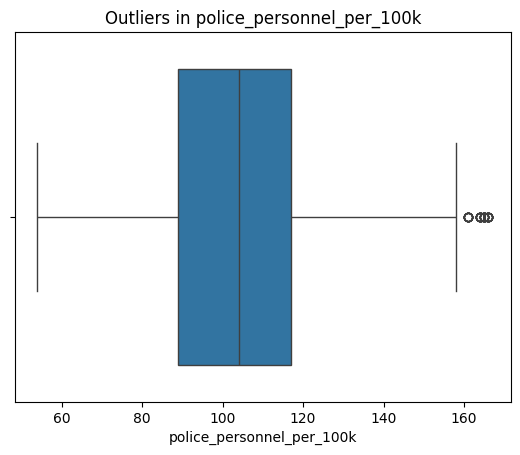

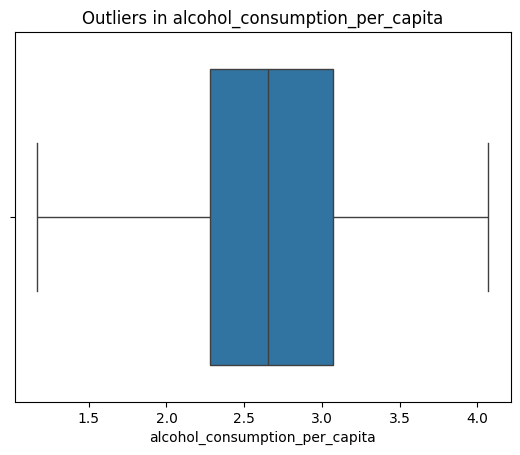

In [4]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

Shape: (6930, 18)
Numeric columns: (6930, 16)


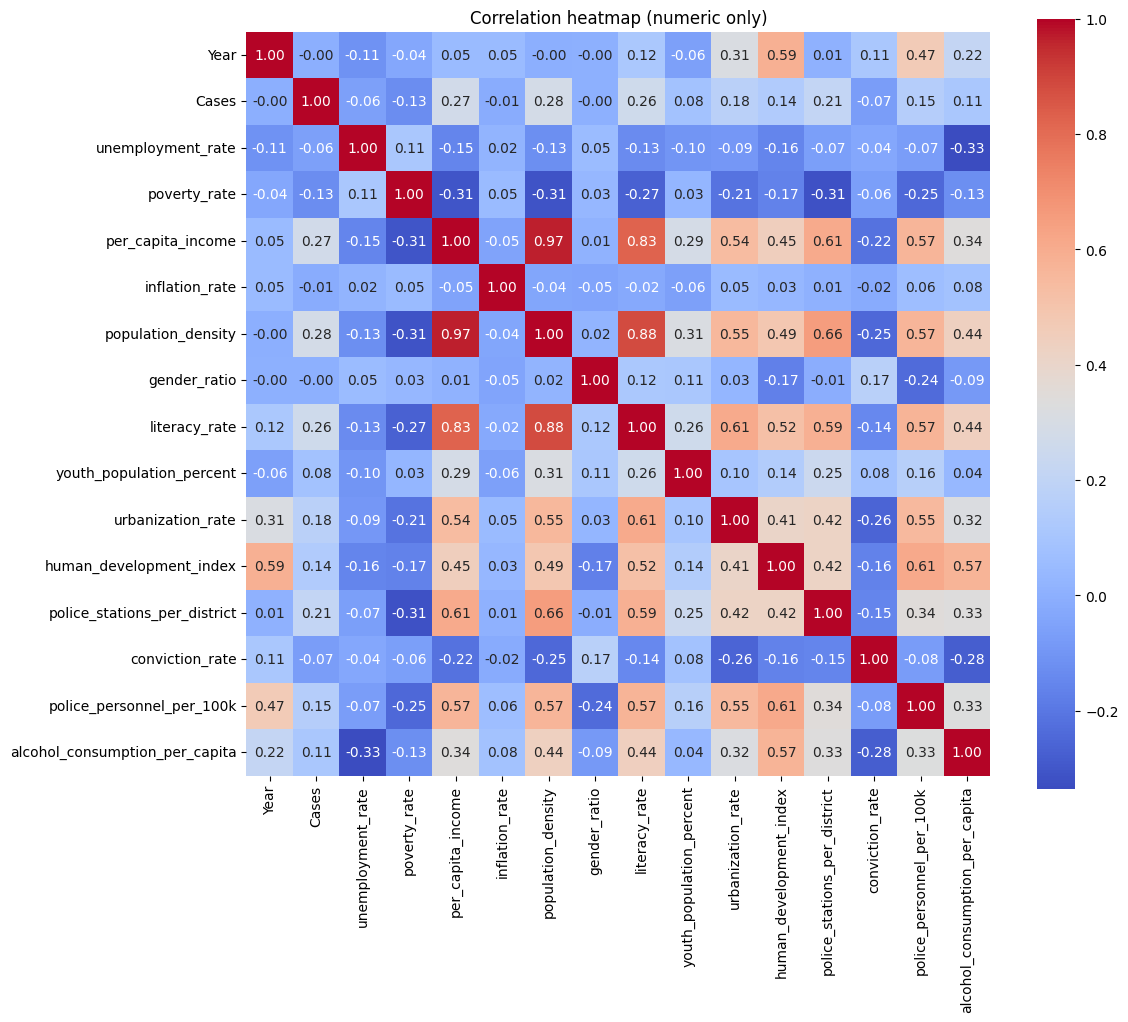

Cases                             1.000000
population_density                0.284434
per_capita_income                 0.270389
literacy_rate                     0.261220
police_stations_per_district      0.208827
urbanization_rate                 0.175745
police_personnel_per_100k         0.154019
human_development_index           0.136850
alcohol_consumption_per_capita    0.111793
youth_population_percent          0.083688
gender_ratio                     -0.000286
Year                             -0.001941
inflation_rate                   -0.012608
unemployment_rate                -0.060418
conviction_rate                  -0.069536
poverty_rate                     -0.126144
Name: Cases, dtype: float64


In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

print("Shape:", df.shape)
print("Numeric columns:", df.select_dtypes(include=[np.number]).shape)

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col].str.replace(',',''))
        except Exception:
            pass

num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation heatmap (numeric only)")
plt.show()

target = 'Cases'
print(num_df.corr()[target].sort_values(ascending=False))


C:\Users\janvi\AppData\Local\Temp\ipykernel_21000\1615905644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_crimes.values, y=state_crimes.index, palette='Reds_r')


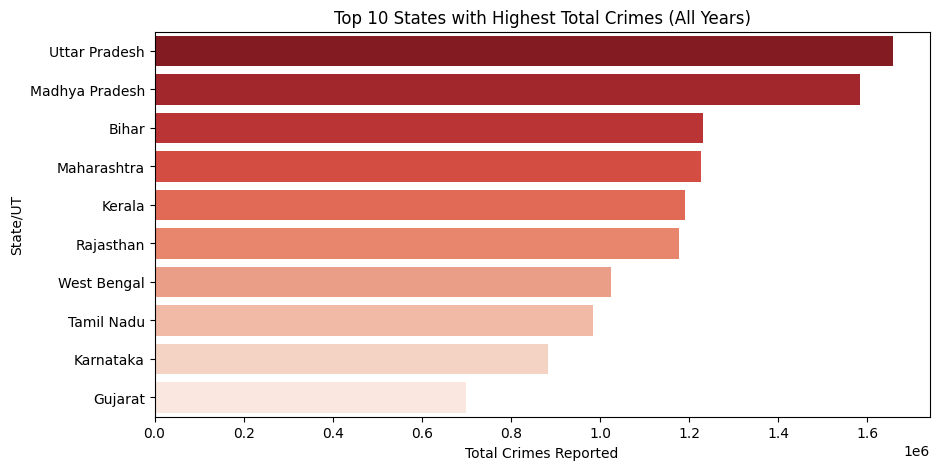

In [6]:
state_crimes = df.groupby('State')['Cases'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=state_crimes.values, y=state_crimes.index, palette='Reds_r')
plt.title('Top 10 States with Highest Total Crimes (All Years)')
plt.xlabel('Total Crimes Reported')
plt.ylabel('State/UT')
plt.show()

In [7]:
# 1. column names
print(df.columns.tolist())

# 2. first rows
print(df.head(10))

# 3. how many unique states and years
print("Unique states:", df['State'].nunique() if 'State' in df.columns else df['State'].nunique())
print("Unique years:", df['Year'].nunique())


['State', 'Crime_Type', 'Year', 'Cases', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']
                       State              Crime_Type  Year  Cases  \
0  Andaman & Nicobar Islands                Burglary  2001     57   
1  Andaman & Nicobar Islands                 Dacoity  2001      7   
2  Andaman & Nicobar Islands            Dowry Deaths  2001      0   
3  Andaman & Nicobar Islands  Kidnapping & Abduction  2001     33   
4  Andaman & Nicobar Islands                  Murder  2001     10   
5  Andaman & Nicobar Islands                    Rape  2001      0   
6  Andaman & Nicobar Islands                   Riots  2001      6   
7  Andaman & Nicobar Islands                 Robbery  2001      0   
8  Andaman & Nico